## SFC Meteorology Obs from:

__Platform Notes:__
+ PRAWC_RC02:
    - Met Package
+ PRAWC_RC12:
    - Met Package
+ PRAWC_MC12 - Prawler/GPS only ... only engr data first

__pyversion__==3.8   
__author__==S.Bell

In [1]:
import datetime
print("Last run {0}".format(datetime.datetime.now()))

Last run 2021-08-12 16:58:24.984948


### connecting to erddap and retrieving and basic information

In [6]:
from erddapy import ERDDAP
import pandas as pd
import numpy as np

server_url = 'http://redwing.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

In [16]:
df = pd.read_csv(e.get_search_url(response='csv', search_for='ATRH'))

In [17]:
'We have {} tabledap, {} griddap, and {} wms endpoints.'.format(
    len(set(df['tabledap'].dropna())),
    len(set(df['griddap'].dropna())),
    len(set(df['wms'].dropna()))
)

'We have 8 tabledap, 0 griddap, and 0 wms endpoints.'

In [18]:
datasets = df['Dataset ID'].values
print(datasets)

['TELO0001_ATRH_20086880' 'TELO0001_ATRH_40032301'
 'TELO0001_ATRH_61459192' 'TELO0002_ATRH_61459201'
 'TELO0003_ATRH_61459201' 'TELOM200_ATRH' 'TELORC02_ATRH_RC02'
 'TELORC12_ATRH_RC12']


In [21]:
variables = [e.get_var_by_attr(dataset_id=dataset, long_name=lambda v: v is not None) for dataset in datasets]
print(variables)

[['RH', 'Air_Temp_Std', 'time', 'Air_Temp', 'RH_Std'], ['RH', 'Air_Temp_Std', 'time', 'Air_Temp', 'RH_Std'], ['RH', 'Air_Temp_Std', 'time', 'Air_Temp', 'RH_Std'], ['RH', 'Air_Temp_Std', 'time', 'Air_Temp', 'RH_Std'], ['RH', 'Air_Temp_Std', 'time', 'Air_Temp', 'RH_Std'], ['Air_Temp', 'RH', 'time'], ['RH', 'Air_Temp_Std', 'time', 'Air_Temp', 'RH_Std'], ['RH', 'Air_Temp_Std', 'time', 'Air_Temp', 'RH_Std']]


### getting **local** Data

In [86]:
wdf.index = wdf.index.round('1H')
wdf

,year_doy_hhmm,argosid,latitude,longitude,BP,AT,BV,RH,WS,WD,SR,AZ
sampletime,,,,,,,,,,,,
2021-03-09 02:00:00,2021-03-09 02:42:00,28882,47.68600,122.25646,1011.764706,9.5,12.0,50.0,0.2,114.358323,98.825080,271.071580
2021-03-09 04:00:00,2021-03-09 04:27:00,28882,47.68477,122.25709,1012.941176,5.6,11.0,75.0,0.4,158.125088,60.393104,271.071580
2021-03-10 03:00:00,2021-03-10 03:38:00,28882,47.68416,122.25755,1012.941176,5.7,11.0,86.0,0.3,352.957786,21.961129,271.071580
2021-03-11 02:00:00,2021-03-11 02:15:00,28882,47.68263,122.25757,1015.294118,7.8,11.0,71.0,1.1,313.426514,664.324146,271.071580
2021-03-11 02:00:00,2021-03-11 02:17:00,28882,47.68263,122.25757,1015.294118,7.8,11.0,71.0,1.1,313.426514,664.324146,271.071580
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-18 18:00:00,2021-05-18 20:51:00,28882,56.87629,164.07143,1018.823529,3.2,9.0,88.0,6.3,42.354934,400.790601,271.071580
2021-05-18 18:00:00,2021-05-18 20:52:00,28882,56.87629,164.07143,1018.823529,6.4,1.0,88.0,NaN,14.118311,422.751729,321.897501
2021-05-23 18:00:00,2021-05-23 20:48:00,28882,56.87467,164.06731,NaN,NaN,NaN,NaN,NaN,317.662008,1010.211925,77.650713


In [87]:
start_date=datetime.date(2021,5,6)
end_date=datetime.datetime.now()

### retrieving erddap and plotting data

In [23]:
dfs = {} #'TELORC02_ATRH_RC02','TELORC12_ATRH_RC12'
for dataset in ['TELORC02_ATRH_RC02','TELORC02_BARO_RC02','TELORC02_WIND_RC02']:
    d = ERDDAP(server=server_url,
               protocol='tabledap',
               response='csv',
              )

    d.dataset_id=dataset


#     d.relative_constraints = {'time>': 'now-3months'}

    df = d.to_pandas(
        index_col='time (UTC)',
        parse_dates=True,
        skiprows=(1,)  # units information can be dropped.
    ).dropna()

    df.sort_index(inplace=True)
    df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

    df = df.sort_index()

    dfs.update({dataset:df})

In [31]:
df1=pd.concat([dfs['TELORC02_ATRH_RC02'],dfs['TELORC02_BARO_RC02'],dfs['TELORC02_WIND_RC02']],axis=1)


In [33]:
dfs = {} #'TELORC02_ATRH_RC02','TELORC12_ATRH_RC12'
for dataset in ['TELORC12_ATRH_RC12','TELORC12_BARO_RC12','TELORC12_WIND_RC12']:
    d = ERDDAP(server=server_url,
               protocol='tabledap',
               response='csv',
              )

    d.dataset_id=dataset


#     d.relative_constraints = {'time>': 'now-3months'}

    df = d.to_pandas(
        index_col='time (UTC)',
        parse_dates=True,
        skiprows=(1,)  # units information can be dropped.
    ).dropna()

    df.sort_index(inplace=True)
    df.columns = [x[1].split()[0] for x in enumerate(df.columns)]

    df = df.sort_index()

    dfs.update({dataset:df})

In [35]:
df2=pd.concat([dfs['TELORC12_ATRH_RC12'],dfs['TELORC12_BARO_RC12'],dfs['TELORC12_WIND_RC12']],axis=1)


**load second unit to compare**

### Take care of any preliminary QC

### Plot

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt

### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import cmocean

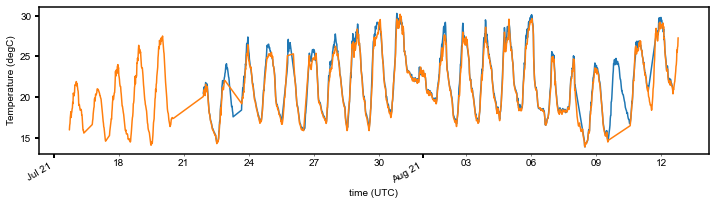

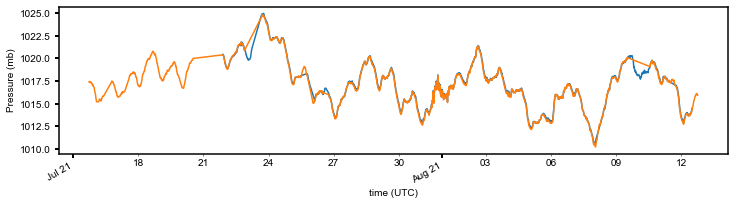

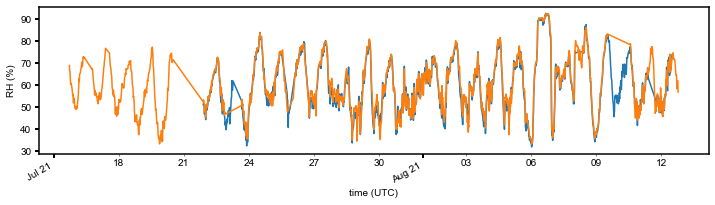

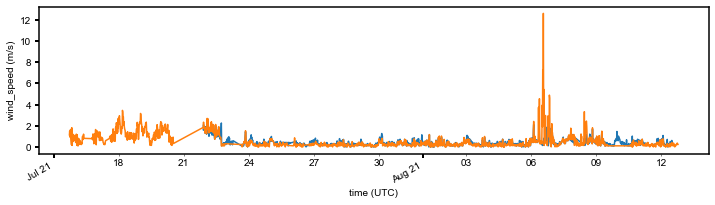

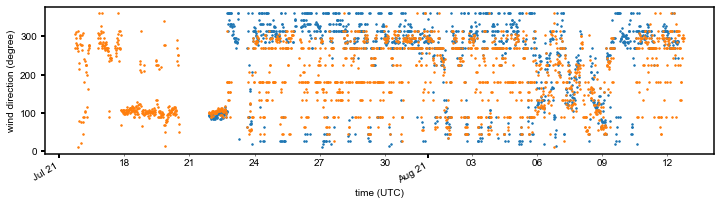

In [43]:
#timeseries
fig, ax = plt.subplots(figsize=(12,3))

for df in [df1,df2]:
    try:
        df['Air_Temp'].plot(ax=ax)
        plt.ylabel('Temperature (degC)')
    except:
        pass
    ax.xaxis.set_major_locator(DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

fig, ax = plt.subplots(figsize=(12,3))
for df in [df1,df2]:
    try:
        df['BaroPres'].plot(ax=ax)
        plt.ylabel('Pressure (mb)')
    except:
        df['BaroPres (mbar)'].plot(ax=ax)
        plt.ylabel('Pressure (mb)')
    ax.xaxis.set_major_locator(DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

fig, ax = plt.subplots(figsize=(12,3))
for df in [df1,df2]:
    try:
        df['RH'].plot(ax=ax)
        plt.ylabel('RH (%)')
    except:
        pass

    ax.xaxis.set_major_locator(DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

fig, ax = plt.subplots(figsize=(12,3))
for df in [df1,df2]:
    df['wind_speed (m s-1)']=np.sqrt(df['V_wind']**2 + df['U_wind']**2)

    try:
        df['wind_speed (m s-1)'].plot(ax=ax)
        plt.ylabel('wind_speed (m/s)')
    except:
        pass

    ax.xaxis.set_major_locator(DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

fig, ax = plt.subplots(figsize=(12,3))
for df in [df1,df2]:
    df['wind_from_direction (degrees true)'] = 270-np.rad2deg(np.arctan2(df['V_wind'],
                                                                     df['U_wind']))
    df['wind_from_direction (degrees true)'][df['wind_from_direction (degrees true)']>360] = df['wind_from_direction (degrees true)'][df['wind_from_direction (degrees true)']>360]-360

    try:
        df['wind_from_direction (degrees true)'].plot(style='.',markersize=3.0,ax=ax)
        plt.ylabel('wind direction (degree)')
    except:
        pass

    ax.xaxis.set_major_locator(DayLocator(bymonthday=[1,15]))
    ax.xaxis.set_minor_locator(DayLocator(range(0,32,3)))
    ax.xaxis.set_minor_formatter(DateFormatter('%d'))
    ax.xaxis.set_major_formatter(DateFormatter('%b %y'))

Text(0, 0.5, 'RC12 WS')

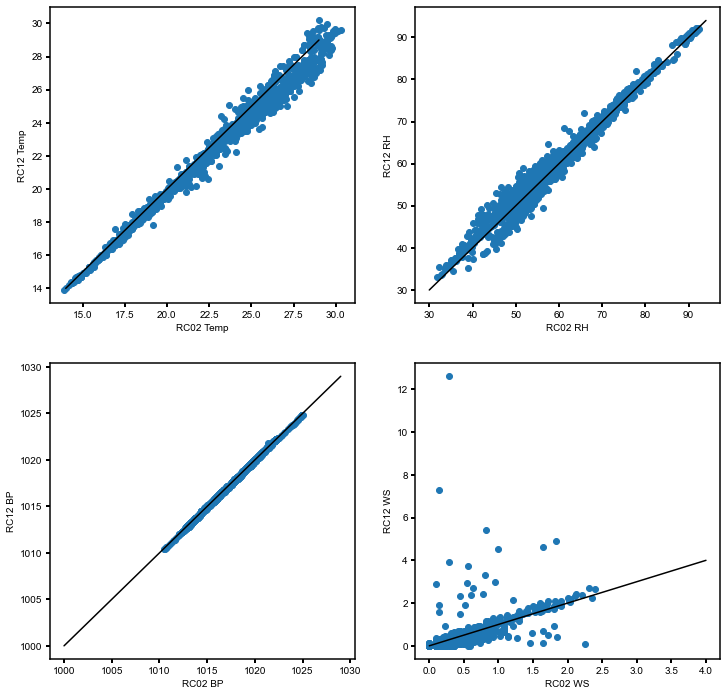

In [171]:
#one to one

#sample on same grid
dfr1 = df1.resample('10s').median()[df1.iloc[0].name:df1.iloc[-1].name]
dfr2 = df2.resample('10s').median()[df1.iloc[0].name:df1.iloc[-1].name]

dfr1['wind_speed (m/s)']=np.sqrt(dfr1['V_wind']**2 + dfr1['U_wind']**2)
dfr2['wind_speed (m/s)']=np.sqrt(dfr2['V_wind']**2 + dfr2['U_wind']**2)

fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].scatter(dfr1['Air_Temp'],dfr2['Air_Temp'])
ax[0,0].plot(np.arange(14,30),np.arange(14,30),'k')
ax[0,0].set_xlabel('RC02 Temp')
ax[0,0].set_ylabel('RC12 Temp')
ax[1,0].scatter(dfr1['BaroPres'],dfr2['BaroPres'])
ax[1,0].plot(np.arange(1000,1030),np.arange(1000,1030),'k')
ax[1,0].set_xlabel('RC02 BP')
ax[1,0].set_ylabel('RC12 BP')
ax[0,1].scatter(dfr1['RH'],dfr2['RH'])
ax[0,1].plot(np.arange(30,95),np.arange(30,95),'k')
ax[0,1].set_xlabel('RC02 RH')
ax[0,1].set_ylabel('RC12 RH')
ax[1,1].scatter(dfr1['wind_speed (m/s)'],dfr2['wind_speed (m/s)'])
ax[1,1].scatter(dfr1['wind_speed (m/s)'],dfr2['wind_speed (m/s)'])
ax[1,1].plot(np.arange(0,5),np.arange(0,5),'k')
ax[1,1].set_xlabel('RC02 WS')
ax[1,1].set_ylabel('RC12 WS')

In [132]:
dfr1['wind_from_direction (degrees true)'] = 270-np.rad2deg(np.arctan2(dfr1['V_wind'],dfr1['U_wind']))
dfr1['wind_from_direction (degrees true)'][dfr1['wind_from_direction (degrees true)']>360] = dfr1['wind_from_direction (degrees true)'][dfr1['wind_from_direction (degrees true)']>360]-360

dfr2['wind_from_direction (degrees true)'] = 270-np.rad2deg(np.arctan2(dfr2['V_wind'],dfr2['U_wind']))
dfr2['wind_from_direction (degrees true)'][dfr2['wind_from_direction (degrees true)']>360] = dfr2['wind_from_direction (degrees true)'][dfr2['wind_from_direction (degrees true)']>360]-360

In [158]:
import seaborn as sns

<AxesSubplot:xlabel='wind_from_direction (degrees true)', ylabel='Count'>

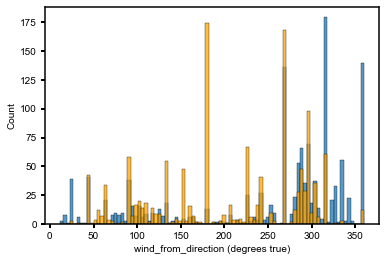

In [181]:
sns.histplot(dfr1[dfr1['wind_speed (m/s)']>=0.05]['wind_from_direction (degrees true)'],bins=90)
sns.histplot(dfr2[dfr2['wind_speed (m/s)']>=0.05]['wind_from_direction (degrees true)'],bins=90, color='orange')